In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\Dell\gitproject\Energy_Demand_Forecasting\data\processed\Energy Consumption Cleaned.csv")

In [5]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [7]:
df.head()

,Unnamed: 0,States,Regions,latitude,longitude,Energy Consumption
Date,,,,,,
2019-02-01,0,Punjab,NR,31.519974,75.980003,119.9
2019-02-01,1,Haryana,NR,28.450006,77.019991,130.3
2019-02-01,2,Rajasthan,NR,26.449999,74.639981,234.1
2019-02-01,3,Delhi,NR,28.669993,77.230004,85.8
2019-02-01,4,UP,NR,27.599981,78.050006,313.9


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15828 entries, 2019-02-01 to 2020-04-12
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   States              15828 non-null  object 
 1   Regions             15828 non-null  object 
 2   latitude            15828 non-null  float64
 3   longitude           15828 non-null  float64
 4   Energy Consumption  15828 non-null  float64
dtypes: float64(3), object(2)
memory usage: 741.9+ KB


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.head()

,States,Regions,latitude,longitude,Energy Consumption
Date,,,,,
2019-02-01,Punjab,NR,31.519974,75.980003,119.9
2019-02-01,Haryana,NR,28.450006,77.019991,130.3
2019-02-01,Rajasthan,NR,26.449999,74.639981,234.1
2019-02-01,Delhi,NR,28.669993,77.230004,85.8
2019-02-01,UP,NR,27.599981,78.050006,313.9


In [17]:
statewise_mean_std = df.groupby('States')['Energy Consumption'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
print(statewise_mean_std)





                         mean        std
States                                  
Maharashtra        430.915417  42.749172
Gujarat            322.906875  39.160120
UP                 315.076667  67.027706
Tamil Nadu         300.402917  35.909834
Rajasthan          218.248750  27.590244
MP                 207.631875  30.705350
Karnataka          203.433542  30.190712
Telangana          186.624583  29.377052
Andhra Pradesh     176.001458  16.059207
Punjab             141.692500  57.432243
West Bengal        139.420208  27.971287
Haryana            138.819167  38.405211
Chhattisgarh        84.154792  10.050163
Delhi               83.762292  26.121279
Bihar               83.405833  15.020390
Odisha              80.615417  10.983526
Kerala              72.109583   6.968101
J&K                 44.163333   4.762303
Uttarakhand         36.225678   6.747446
HP                  26.561042   4.819281
Assam               25.023542   4.771156
Jharkhand           23.863333   1.949131
DNH             

C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\3480174526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states['mean'], ax=axes[0], palette='Blues_d')
C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\3480174526.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_states.index, y=bottom_states['mean'], ax=axes[1], palette='Reds_d')


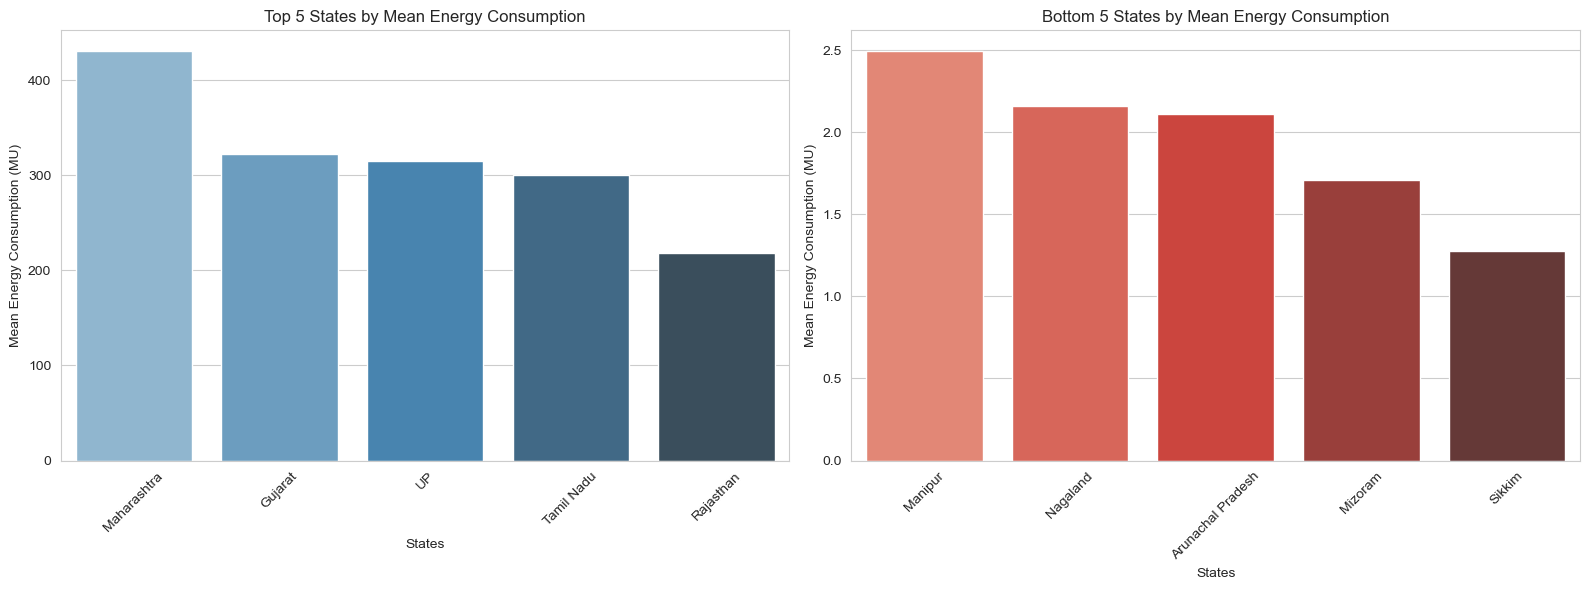

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

top_states = statewise_mean_std.head()
bottom_states = statewise_mean_std.tail()

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Top 5
sns.barplot(x=top_states.index, y=top_states['mean'], ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 States by Mean Energy Consumption')
axes[0].set_ylabel('Mean Energy Consumption (MU)')
axes[0].set_xlabel('States')
axes[0].tick_params(axis='x', rotation=45)

# Bottom 5
sns.barplot(x=bottom_states.index, y=bottom_states['mean'], ax=axes[1], palette='Reds_d')
axes[1].set_title('Bottom 5 States by Mean Energy Consumption')
axes[1].set_ylabel('Mean Energy Consumption (MU)')
axes[1].set_xlabel('States')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\1424641556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='States', y='Energy Consumption', data=filtered_df, palette='Set3')


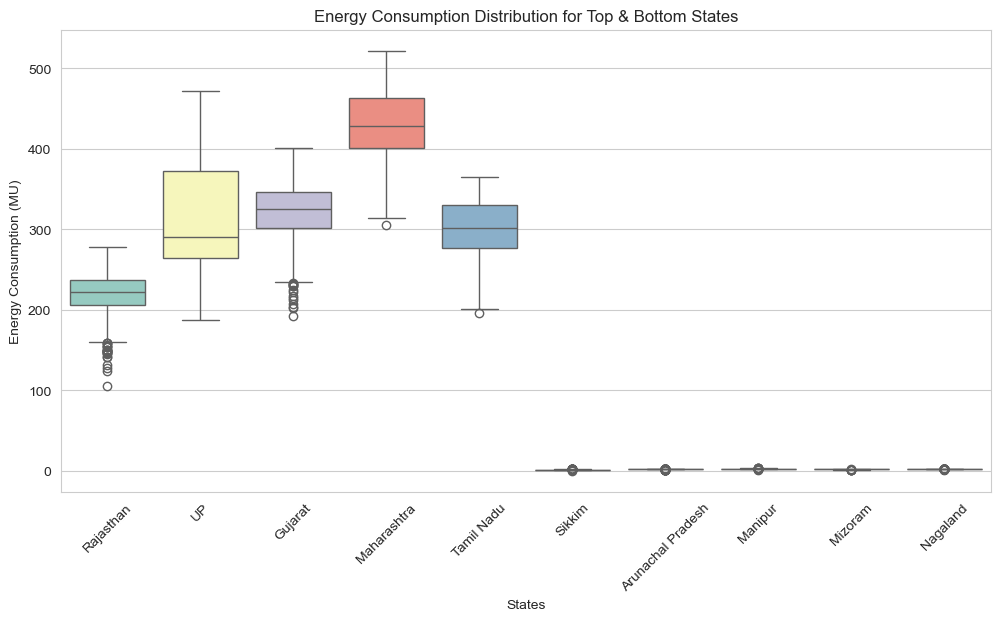

In [21]:
selected_states = list(top_states.index) + list(bottom_states.index)
filtered_df = df[df['States'].isin(selected_states)]

plt.figure(figsize=(12,6))
sns.boxplot(x='States', y='Energy Consumption', data=filtered_df, palette='Set3')
plt.title('Energy Consumption Distribution for Top & Bottom States')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumption (MU)')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\1284427191.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_data = df[df['States'] == state]['Energy Consumption'].resample('M').sum()


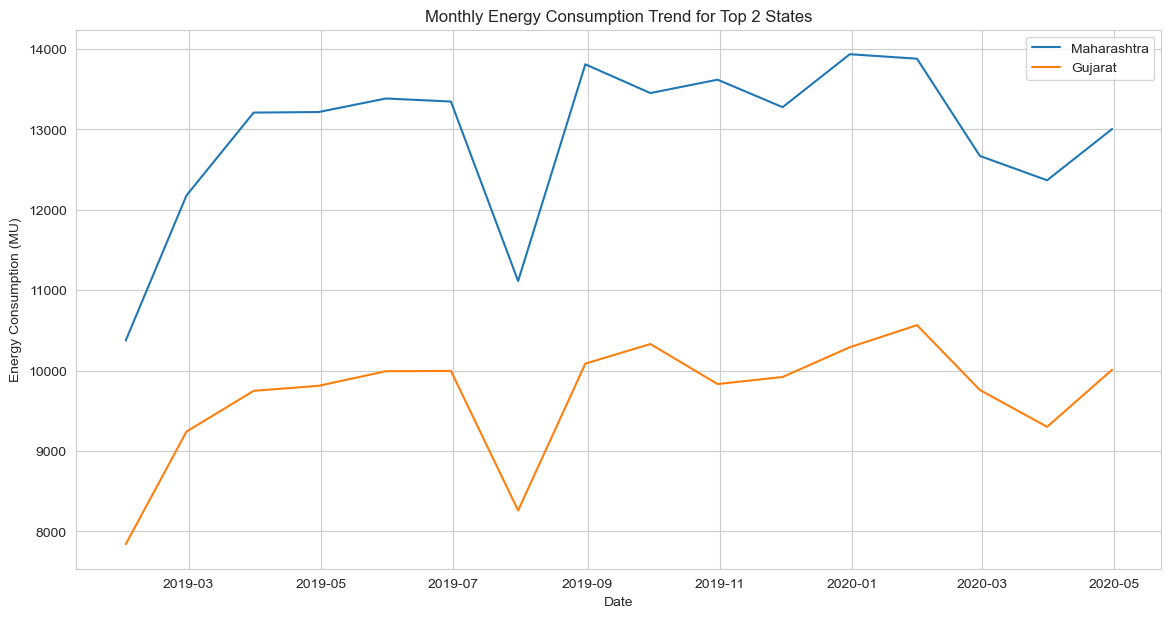

In [23]:
plt.figure(figsize=(14,7))

for state in top_states.index[:2]:
    state_data = df[df['States'] == state]['Energy Consumption'].resample('M').sum()
    plt.plot(state_data.index, state_data, label=state)

plt.title('Monthly Energy Consumption Trend for Top 2 States')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MU)')
plt.legend()
plt.show()


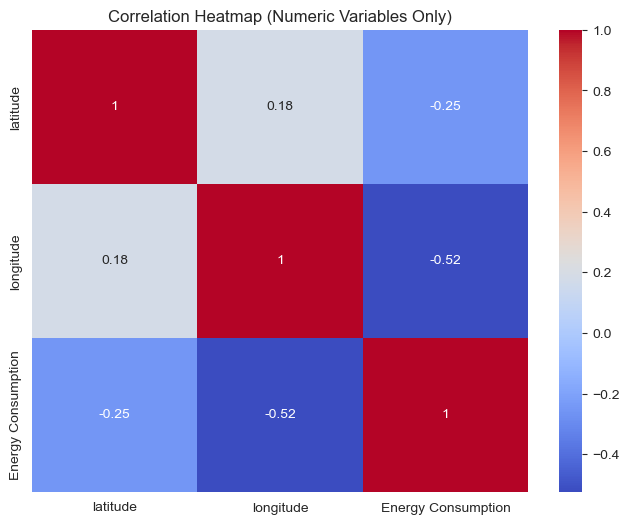

In [27]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Variables Only)')
plt.show()


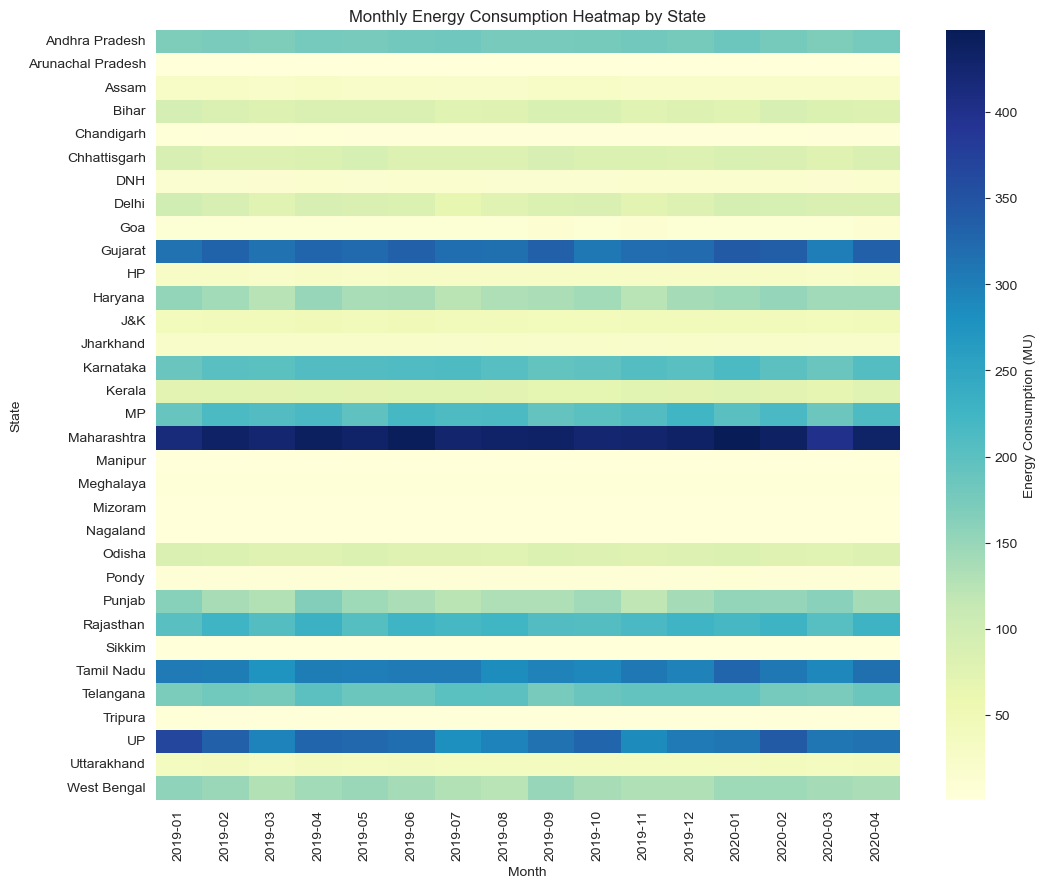

In [29]:
# Pivot table with states as rows and months as columns
monthly_pivot = df.pivot_table(values='Energy Consumption', index='States', columns=df.index.to_period('M'))

plt.figure(figsize=(12,10))
sns.heatmap(monthly_pivot, cmap='YlGnBu', cbar_kws={'label': 'Energy Consumption (MU)'})
plt.title('Monthly Energy Consumption Heatmap by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\866506977.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_series = df[df['States'] == state]['Energy Consumption'].resample('M').sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\866506977.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  state_series = state_series.fillna(method='ffill')


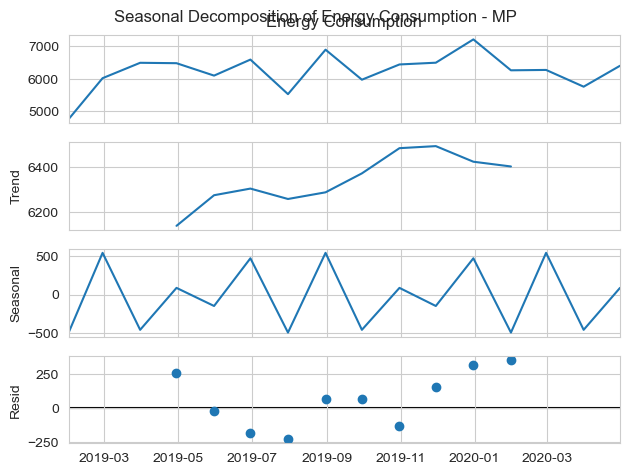

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

state = 'MP'
state_series = df[df['States'] == state]['Energy Consumption'].resample('M').sum()
state_series = state_series.fillna(method='ffill')

decomposition = seasonal_decompose(state_series, model='additive', period=6)
fig = decomposition.plot()
fig.suptitle(f'Seasonal Decomposition of Energy Consumption - {state}')
plt.show()


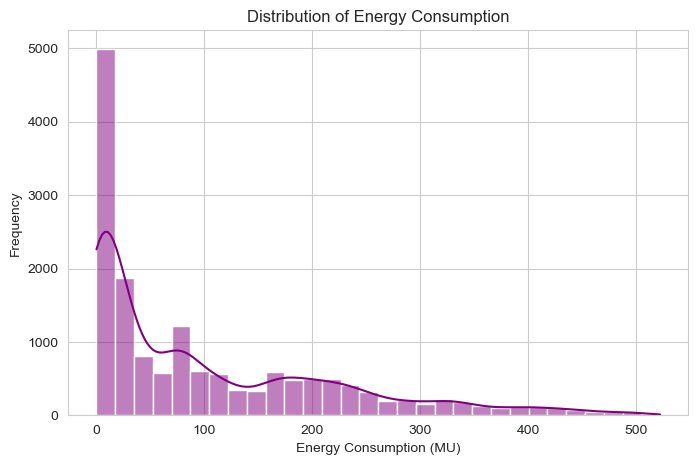

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df['Energy Consumption'], bins=30, kde=True, color='purple')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (MU)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\503269962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regions', y='Energy Consumption', data=df, palette='pastel')


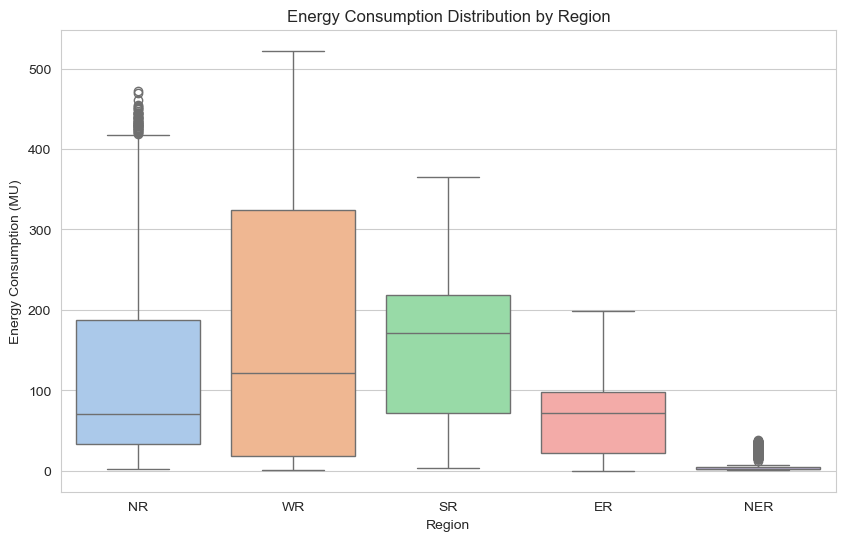

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Regions', y='Energy Consumption', data=df, palette='pastel')
plt.title('Energy Consumption Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (MU)')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\3774965777.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_cum = df[df['States'] == state]['Energy Consumption'].resample('M').sum().cumsum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\3774965777.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_cum = df[df['States'] == state]['Energy Consumption'].resample('M').sum().cumsum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\3774965777.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_cum = df[df['States'] == state]['Energy Consumption'].resample('M').sum().cumsum()


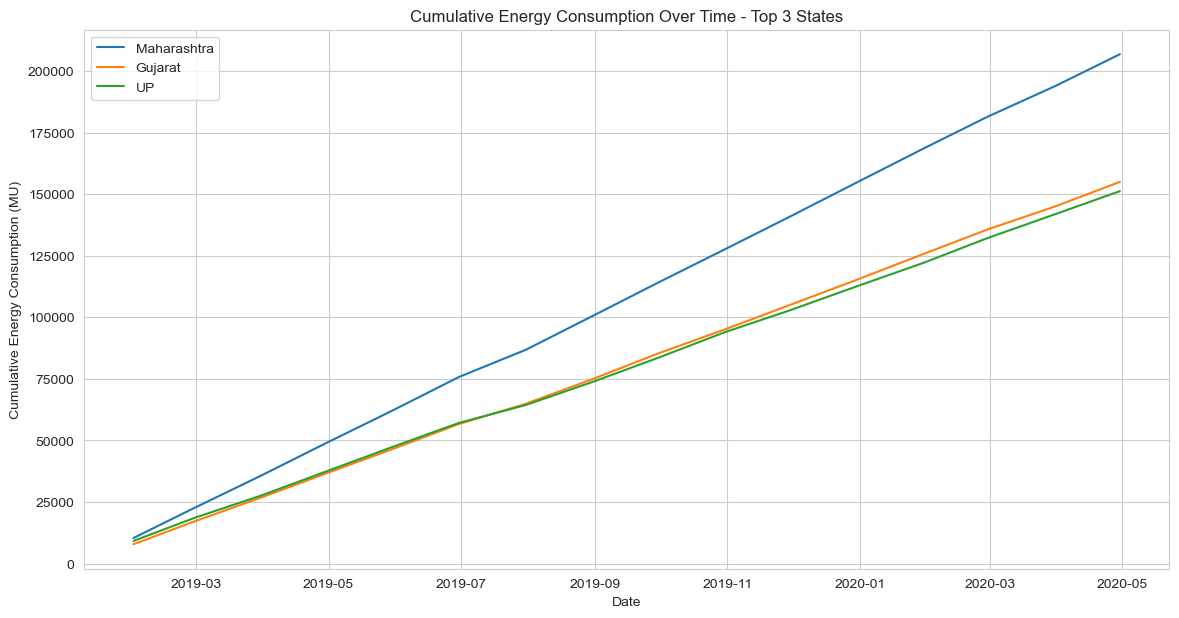

In [41]:
plt.figure(figsize=(14,7))
top_3_states = statewise_mean_std.head(3).index

for state in top_3_states:
    state_cum = df[df['States'] == state]['Energy Consumption'].resample('M').sum().cumsum()
    plt.plot(state_cum.index, state_cum, label=state)

plt.title('Cumulative Energy Consumption Over Time - Top 3 States')
plt.xlabel('Date')
plt.ylabel('Cumulative Energy Consumption (MU)')
plt.legend()
plt.show()


In [47]:
# Assuming your dataframe `df` has columns: 'States' and 'Energy Consumption'

peak_load_by_state = df.groupby('States')['Energy Consumption'].max().sort_values(ascending=False)

print("Peak Load by State:")
print(peak_load_by_state)


Peak Load by State:
States
Maharashtra          522.1
UP                   471.8
Gujarat              400.8
Tamil Nadu           365.4
Punjab               300.0
Rajasthan            278.0
Karnataka            273.3
MP                   272.3
Telangana            256.2
Haryana              237.2
Andhra Pradesh       205.1
West Bengal          198.5
Delhi                147.1
Bihar                121.4
Odisha               113.0
Chhattisgarh         111.6
Kerala                89.4
J&K                   54.2
Uttarakhand           53.2
Assam                 38.0
HP                    34.0
Jharkhand             28.9
DNH                   19.5
Goa                   14.0
Pondy                  9.7
Chandigarh             7.4
Meghalaya              6.8
Tripura                6.6
Manipur                3.2
Sikkim                 2.8
Nagaland               2.7
Arunachal Pradesh      2.6
Mizoram                2.2
Name: Energy Consumption, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\1467843354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_states.index, y=top5_states.values, palette='Reds')


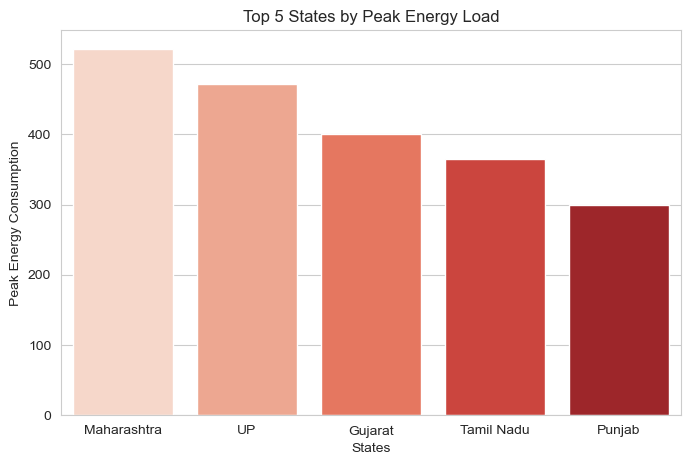

In [49]:
top5_states = peak_load_by_state.head()

plt.figure(figsize=(8,5))
sns.barplot(x=top5_states.index, y=top5_states.values, palette='Reds')
plt.title('Top 5 States by Peak Energy Load')
plt.ylabel('Peak Energy Consumption')
plt.xlabel('States')
plt.show()


Date/time of Peak Load per State:
           Date     States  Peak Energy Consumption
0    2019-06-09     Punjab                     96.5
1    2019-06-09    Haryana                    111.5
2    2019-06-09  Rajasthan                    213.6
3    2019-06-09      Delhi                     60.2
4    2019-06-09         UP                    240.9
...         ...        ...                      ...
1084 2020-02-27    Manipur                      2.5
1085 2020-02-27  Meghalaya                      5.7
1086 2020-02-27    Mizoram                      1.8
1087 2020-02-27   Nagaland                      2.1
1088 2020-02-27    Tripura                      5.1

[1089 rows x 3 columns]


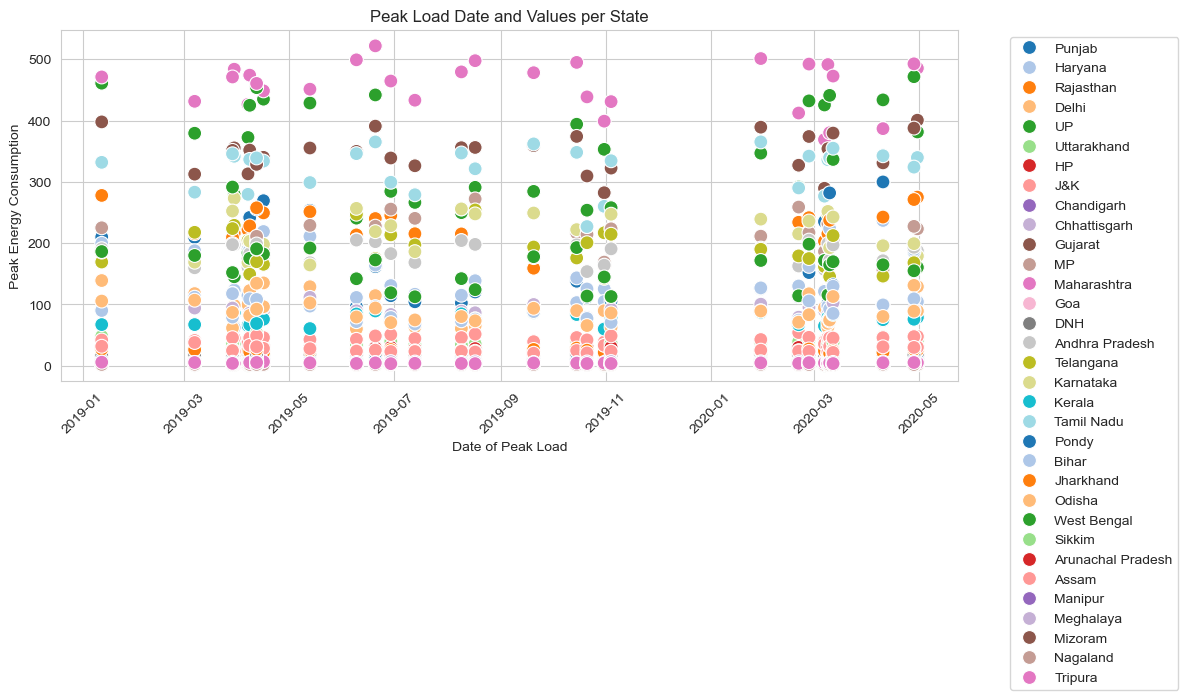

In [51]:
# Assuming your DataFrame index is DateTime and columns include 'States' and 'Energy Consumption'

# Find the index of max energy consumption per state
idx_max = df.groupby('States')['Energy Consumption'].idxmax()

# Select rows at those indices, including Date (which is index), States and Energy Consumption
peak_load_dates = df.loc[idx_max, ['States', 'Energy Consumption']]

# The Date is the index here; reset index to make it a column
peak_load_dates = peak_load_dates.reset_index()

# Rename columns for clarity
peak_load_dates.columns = ['Date', 'States', 'Peak Energy Consumption']

print("Date/time of Peak Load per State:")
print(peak_load_dates)

# Visualization: Plot peak load date vs. peak load for each state
plt.figure(figsize=(12,6))
sns.scatterplot(data=peak_load_dates, x='Date', y='Peak Energy Consumption', hue='States', palette='tab20', s=100)
plt.title('Peak Load Date and Values per State')
plt.xlabel('Date of Peak Load')
plt.ylabel('Peak Energy Consumption')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\2865011155.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


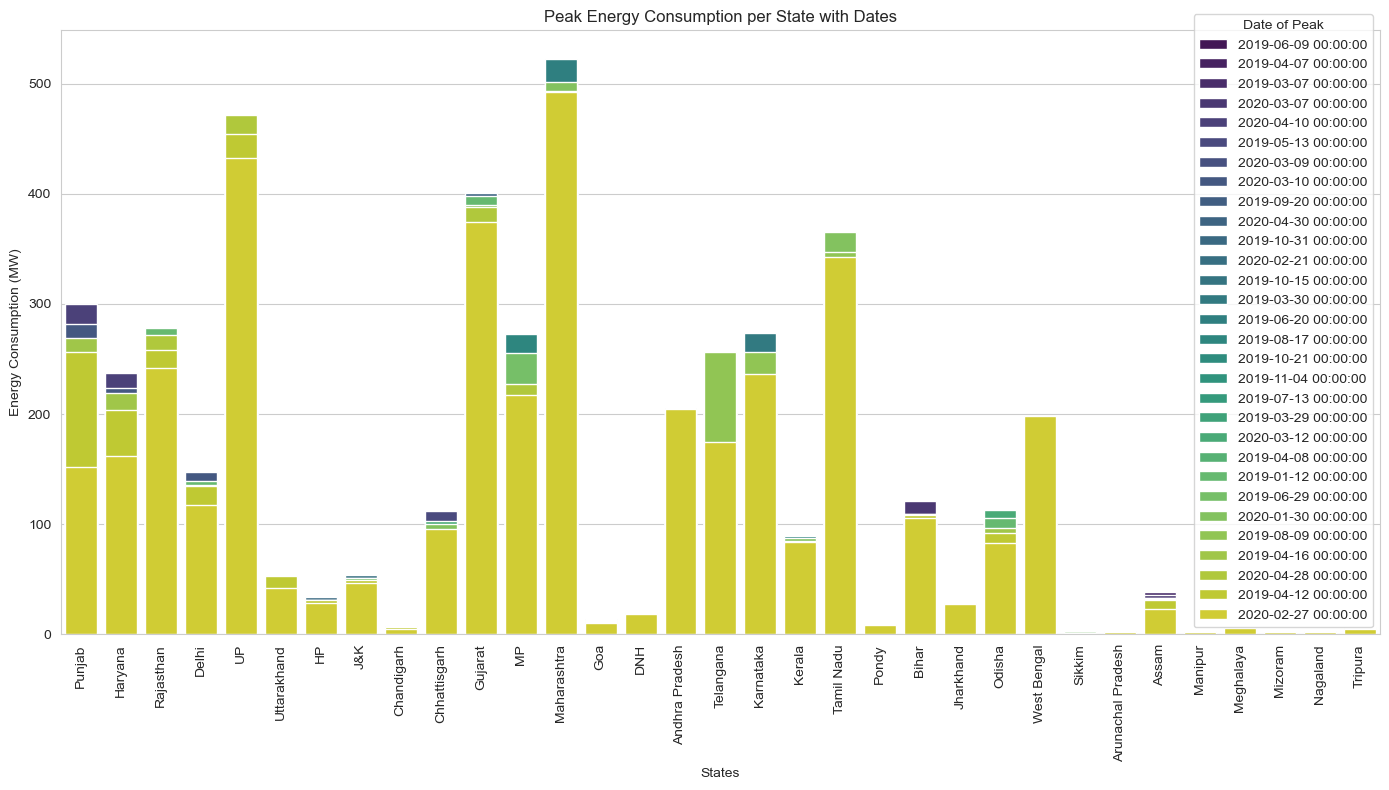

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find peak load dates per state
peak_load_info = df.loc[df.groupby('States')['Energy Consumption'].idxmax()][['States', 'Energy Consumption']]
peak_load_info['Date'] = df.loc[df.groupby('States')['Energy Consumption'].idxmax()].index
peak_load_info = peak_load_info.set_index('States')

# Reset index for plotting
peak_load_info = peak_load_info.reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=peak_load_info, x='States', y='Energy Consumption', hue='Date', dodge=False, palette='viridis')

plt.title('Peak Energy Consumption per State with Dates')
plt.xticks(rotation=90)
plt.ylabel('Energy Consumption (MW)')
plt.xlabel('States')
plt.legend(title='Date of Peak')
plt.tight_layout()
plt.show()


In [59]:
from statsmodels.tsa.stattools import adfuller

# Example: Select one state (e.g., 'Madhya Pradesh')
state = 'Madhya Pradesh'
state_series = df[df['States'] == state]['Energy Consumption']
state_series.index = pd.to_datetime(state_series.index)

# Resample to monthly to reduce noise
monthly_series = state_series.resample('MS').sum()

# Drop missing values
monthly_series = monthly_series.dropna()


In [63]:
from statsmodels.tsa.stattools import adfuller

# Ensure index is datetime
df.index = pd.to_datetime(df.index)

# Get unique states
states = df['States'].unique()

# Store results
adf_results = []

for state in states:
    # Filter and resample
    state_series = df[df['States'] == state]['Energy Consumption']
    monthly_series = state_series.resample('MS').sum().dropna()

    # Skip if series is empty or constant
    if len(monthly_series) < 12 or monthly_series.max() == monthly_series.min():
        continue

    # Perform ADF test
    result = adfuller(monthly_series)

    adf_results.append({
        'State': state,
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Stationary': result[1] < 0.05
    })

# Convert to DataFrame
adf_df = pd.DataFrame(adf_results)

# Display
print(adf_df.sort_values(by='p-value'))


                State  ADF Statistic       p-value  Stationary
13                Goa     -29.552844  0.000000e+00        True
7                 J&K    -274.575709  0.000000e+00        True
25             Sikkim      -5.874765  3.178577e-07        True
2           Rajasthan      -5.588309  1.347055e-06        True
24        West Bengal      -4.877185  3.862142e-05        True
32            Tripura      -4.801606  5.400239e-05        True
26  Arunachal Pradesh      -4.382064  3.192953e-04        True
29          Meghalaya      -4.337589  3.821443e-04        True
16          Telangana      -3.979777  1.520186e-03        True
21              Bihar      -3.860171  2.348323e-03        True
9        Chhattisgarh      -3.815873  2.749027e-03        True
20              Pondy      -3.512709  7.666636e-03        True
15     Andhra Pradesh      -3.440999  9.638148e-03        True
23             Odisha      -2.892856  4.618506e-02        True
28            Manipur      -2.705437  7.310207e-02     

C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\642528929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adf_df, x='Stationary', palette='Set2')


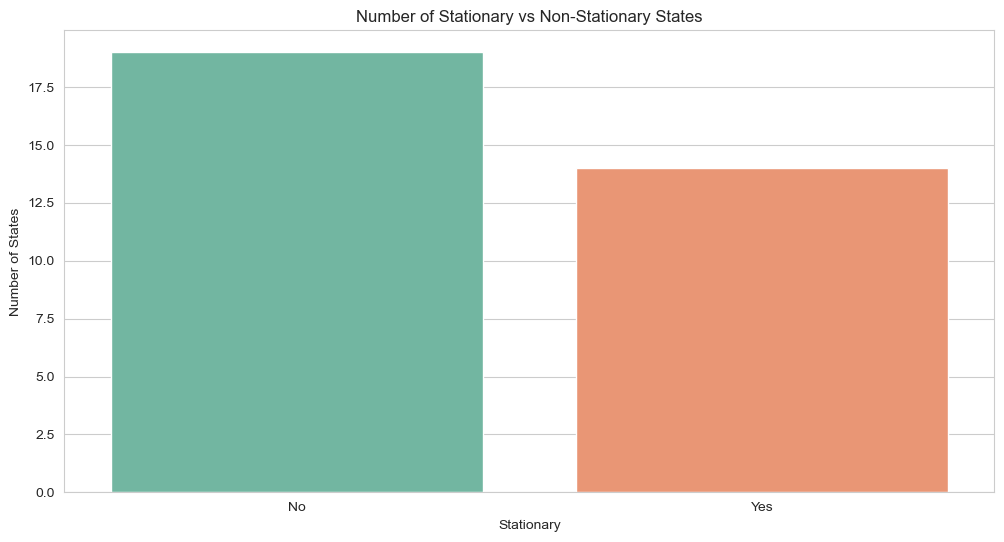

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=adf_df, x='Stationary', palette='Set2')
plt.title('Number of Stationary vs Non-Stationary States')
plt.xlabel('Stationary')
plt.ylabel('Number of States')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_4364\2440250402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stationary, x='State', y='p-value', palette='Blues_d')


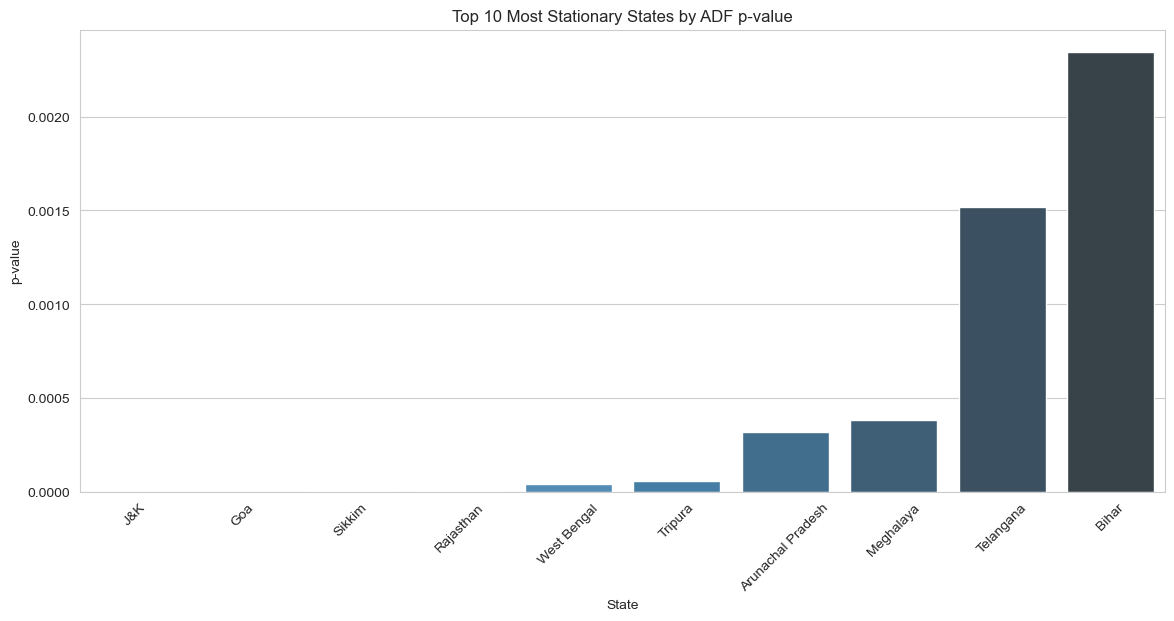

In [67]:
top_stationary = adf_df[adf_df['Stationary']].sort_values(by='p-value').head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_stationary, x='State', y='p-value', palette='Blues_d')
plt.title('Top 10 Most Stationary States by ADF p-value')
plt.ylabel('p-value')
plt.xticks(rotation=45)
plt.show()


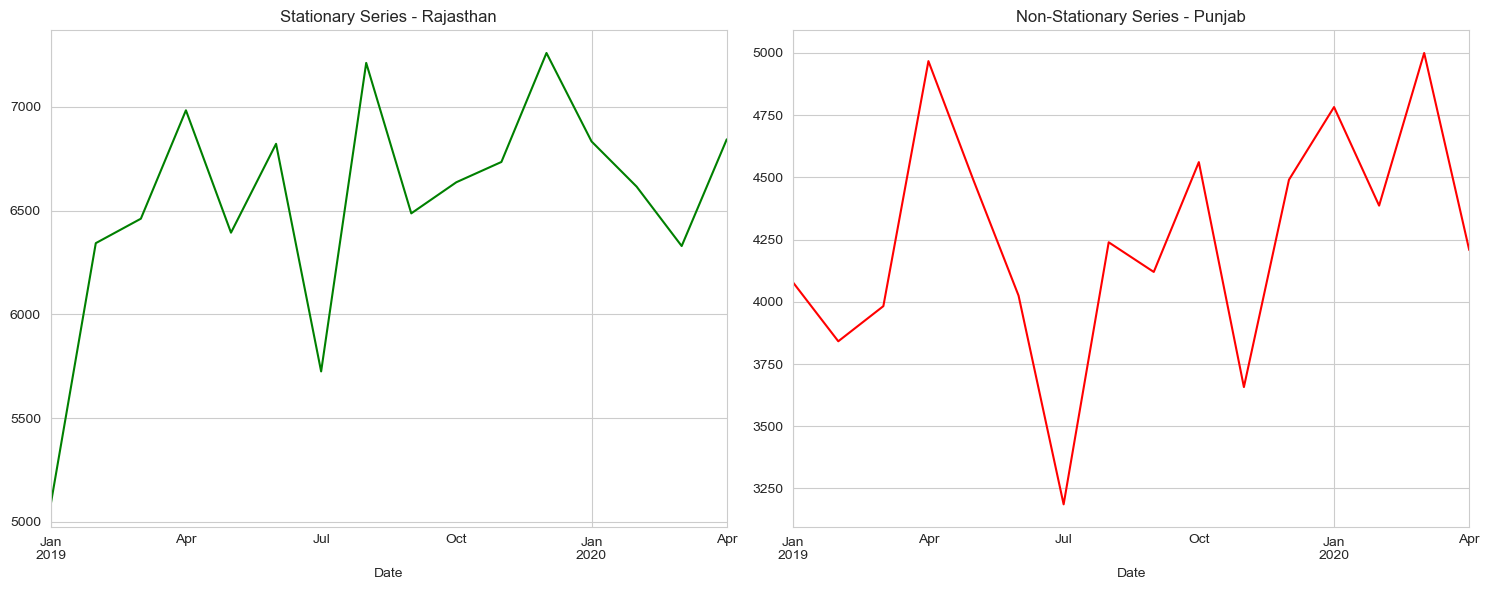

In [69]:
# Select states
stationary_state = adf_df[adf_df['Stationary']].iloc[0]['State']
non_stationary_state = adf_df[~adf_df['Stationary']].iloc[0]['State']

# Prepare series
df.index = pd.to_datetime(df.index)
stationary_series = df[df['States'] == stationary_state]['Energy Consumption'].resample('MS').sum()
non_stationary_series = df[df['States'] == non_stationary_state]['Energy Consumption'].resample('MS').sum()

# Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
stationary_series.plot(title=f'Stationary Series - {stationary_state}', color='green')

plt.subplot(1, 2, 2)
non_stationary_series.plot(title=f'Non-Stationary Series - {non_stationary_state}', color='red')

plt.tight_layout()
plt.show()
